In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf

print(tf.__version__)

2.19.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [8]:
x_train[0].shape

(28, 28)

In [10]:
y_train[0]

np.uint8(9)

In [12]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[y_train[9]])

Sandal


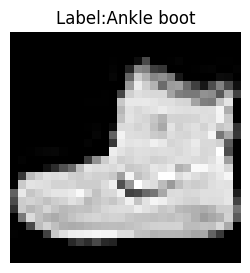

In [19]:
#plot the 0th image

import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(x_train[0],cmap='gray')
plt.title('Label:{}'.format(labels[y_train[0]]))
plt.axis('off')
plt.show()



In [20]:
#normalize the data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
print(labels[y_train[9]])

Sandal


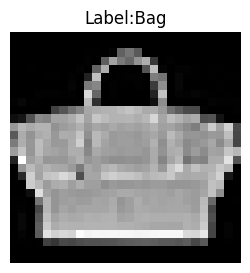

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(x_train[233],cmap='gray')
plt.title('Label:{}'.format(labels[y_train[233]]))
plt.axis('off')
plt.show()


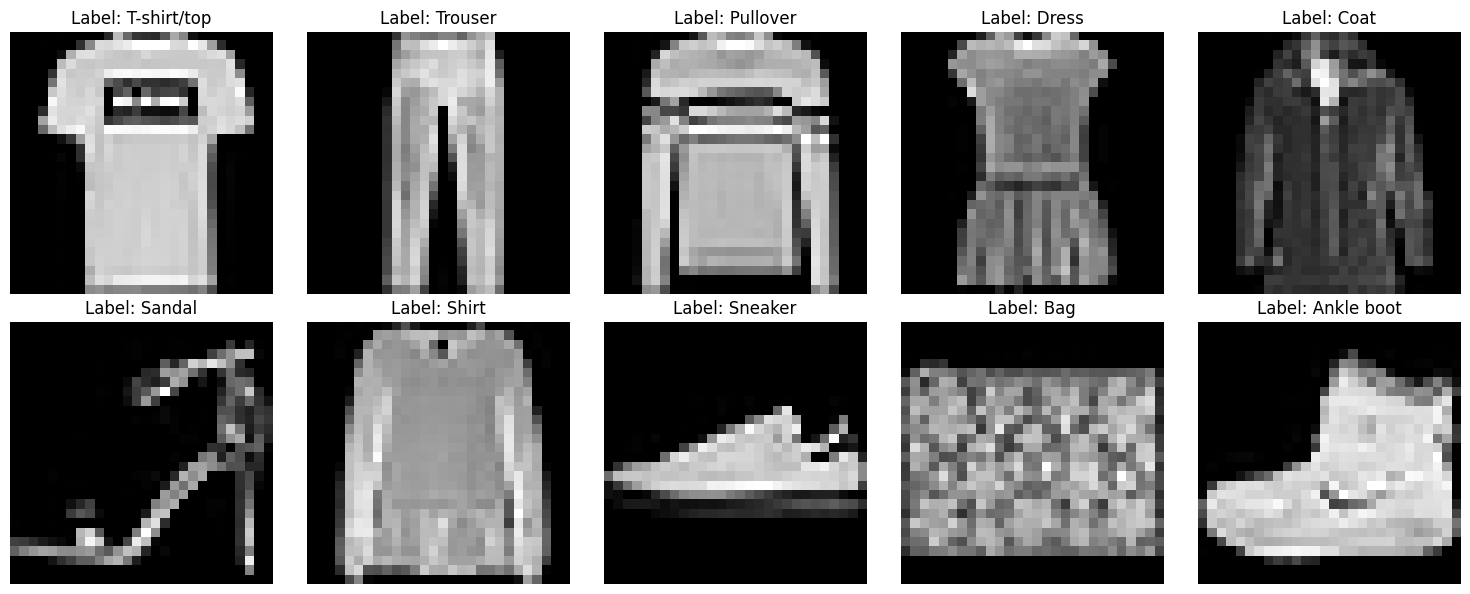

In [27]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(y_train)
num_labels = len(unique_labels)

cols = 5
rows = int(np.ceil(num_labels / cols))

plt.figure(figsize=(cols*3, rows*3))

for idx, label in enumerate(unique_labels):
    # find first image with this label
    image_index = np.where(y_train == label)[0][0]

    plt.subplot(rows, cols, idx + 1)
    plt.imshow(x_train[image_index], cmap='gray')
    plt.title(f"Label: {labels[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [26]:
# import matplotlib.pyplot as plt

# rows, cols = 4, 4  # grid size
# plt.figure(figsize=(cols*3, rows*3))

# for i in range(rows * cols):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(x_train[i], cmap='gray')
#     plt.title(f"Label: {labels[y_train[i]]}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()



In [29]:
SEED = 12345

import os,random

os.environ["PYTHONHASHSEED"] = str(SEED)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ.setdefault("PYTHONHASHSEED",str(SEED))

random.seed(SEED)
import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)


print("TF:",tf.__version__)
print("Numpy:",np.__version__)
print("Physical devices",tf.config.list_logical_devices())

TF: 2.19.0
Numpy: 2.0.2
Physical devices [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


In [30]:
#build Model

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,Flatten,Dropout

# from tensorflow.keras.initializers import LecunUniform
# initializer = lecun_normal()

In [31]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation='softmax'))



In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#train the model

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7688 - loss: 0.6631 - val_accuracy: 0.8487 - val_loss: 0.4301
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8593 - loss: 0.3860 - val_accuracy: 0.8620 - val_loss: 0.3893
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8770 - loss: 0.3375 - val_accuracy: 0.8687 - val_loss: 0.3675
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8851 - loss: 0.3121 - val_accuracy: 0.8745 - val_loss: 0.3526
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8923 - loss: 0.2915 - val_accuracy: 0.8732 - val_loss: 0.3468
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8991 - loss: 0.2768 - val_accuracy: 0.8764 - val_loss: 0.3434
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9033 - loss: 0.2621 - val_accuracy: 0.8785 - val_loss: 0.3381
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9073 - loss: 0.2497 - val_accuracy: 0.

In [41]:
(0.9272) - (0.8736)

0.05359999999999998

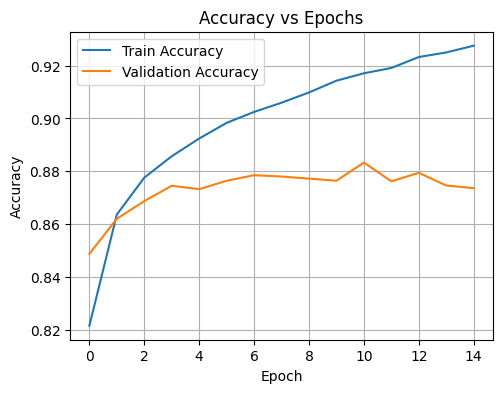

In [43]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.grid(True)



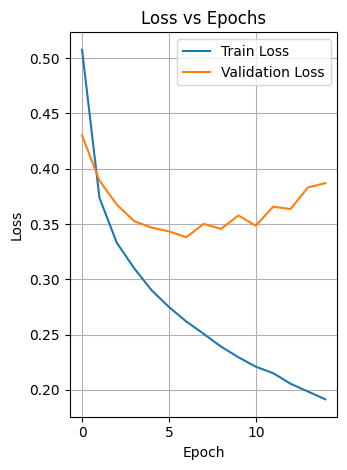

In [42]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [45]:
train_loss, train_accuracy = model.evaluate(
    x_train, y_train, verbose=0
)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")


test_loss, test_accuracy = model.evaluate(
    x_test, y_test, verbose=0
)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Training Loss: 0.2256
Training Accuracy: 0.9147
Test Loss: 0.3870
Test Accuracy: 0.8736


In [47]:
(0.9147 - 0.8736) *100

4.109999999999991

In [49]:
#checking for overfitting
#1 : test accuracy must be at least 80%
#2 : (train_accuracy - test_accuracy ) should be less than 5%



print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
percentage_difference =(train_accuracy - test_accuracy) * 100
print("percentage_difference",percentage_difference)

if test_accuracy >= 0.80 and (train_accuracy - test_accuracy) < 0.05:
  print("*" * 60)
  print("The model is not overfitting")
else:
  print("*" * 60)
  print("The model is overfitting")


Training Accuracy: 0.9147
Test Accuracy: 0.8736
percentage_difference 4.108333587646484
************************************************************
The model is not overfitting


In [52]:
#predict on x_test

y_pred = model.predict(x_test)
print(y_pred.shape)
y_pred = np.argmax(y_pred,axis=1)
y_pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


(10000,)

In [54]:
#ploting the confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

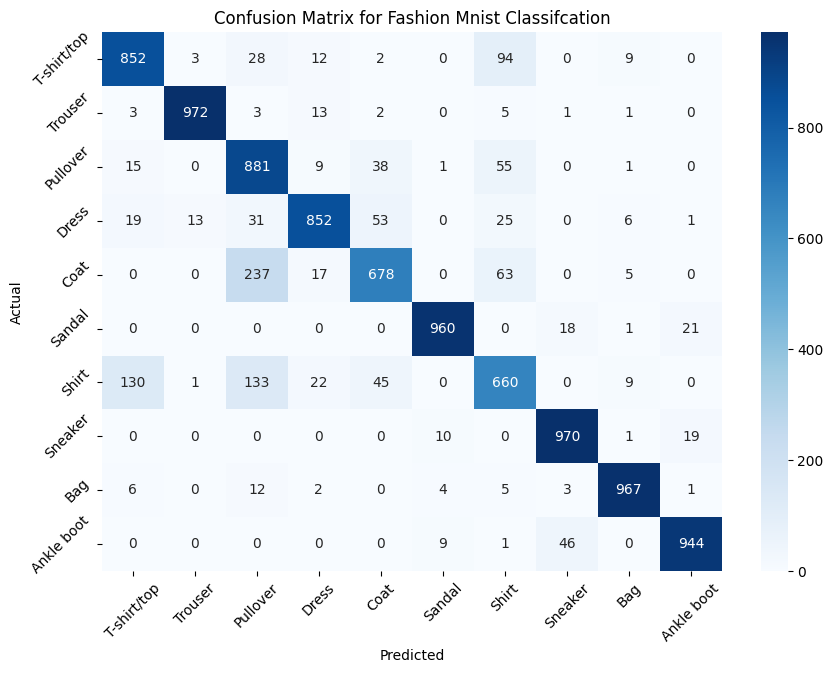

In [60]:
plt.figure(figsize=(10,7))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Fashion Mnist Classifcation')
plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels, rotation=45)
plt.show()

In [63]:
np.where(y_test != y_pred)[0]

misclassified_images_idx = np.where(y_test != y_pred)[0]
print(len(misclassified_images_idx))

error =1264/10000 *100
print('error' , error)
print('accuracy:',(100 - error))

1264
error 12.64
accuracy: 87.36


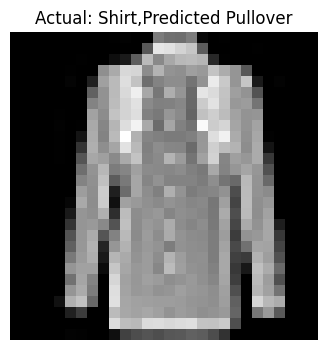

In [70]:
i=np.random.choice(misclassified_images_idx)
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.imshow(x_test[i], cmap='gray')
plt.title(f"Actual: {labels[y_test[i]]},Predicted {labels[y_pred[i]]}")
plt.gca().axis('off')
plt.show()

#mnist ref

build instantiate the ANN model with decision tree classifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import  accuracy_score,classification_report,confusion_matrix

dc = DecisionTreeClassifier(max_depth=10,random_state=42)

dc.fit(x_train.reshape(60000,28*28),y_train)

y_pred_train = dc.predict(x_train.reshape(60000,28*28))

y_pred_test = dc.predict(x_test.reshape(10000,28*28))

accuracy score for train and test

print("Train accuracy",accuracy_score(y_train,y_pred_train))
print("Test accuracy", accuracy_score(y_test,y_pred_test))

build instantiate the ANN model with SVM
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score

sv = SVC(kernel="linear",random_state=42)

sv.fit(x_train.reshape(60000,28*28),y_train)

y_pred_train = sv.predict(x_train.reshape(60000,28*28))
y_pred_test = sv.predict(x_test.reshape(10000,28*28))

print("Train accuracy",accuracy_score(y_train,y_pred_train))
print("Test accuracy", accuracy_score(y_test,y_pred_test))


build instantiate the DL model

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,Flatten,Dropout

from tensorflow.keras.initializers import lecun_normal

initializer = lecun_normal()

model5 =Sequential()
model5.add(Input(shape=(28,28,1)))
model5.add(Flatten())
model5.add(Dropout(rate=0.2))
model5.add(Dense(128,activation='relu', kernel_initializer=initializer))
model5.add(Dropout(rate=0.4))
model5.add(Dense(64,activation='relu',kernel_initializer=initializer))
model5.add(Dropout(rate=0.2))
model5.add(Dense(10,activation='softmax',kernel_initializer=initializer))

model5.summary()

compile the model


model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train the model
r = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

 r = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15,batch_size=64)